In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.isin(['',' ']).sum()
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
print(data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


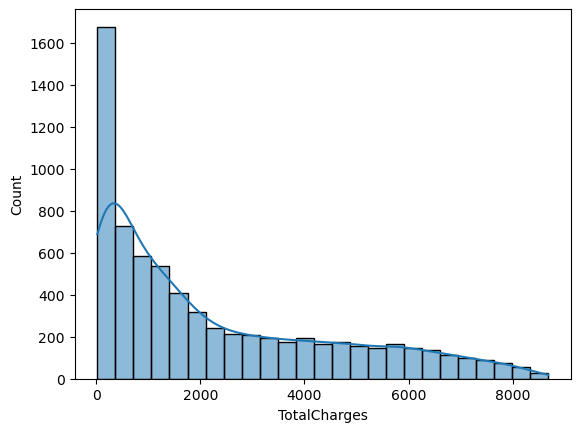

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['TotalCharges'],kde=True)
plt.show() #it is skewed so fill it with median value
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='median')
data['TotalCharges']=si.fit_transform(data[['TotalCharges']])

In [ ]:
from sklearn.preprocessing import LabelEncoder
data.drop('customerID',axis=1,inplace=True)
col_names=data.select_dtypes(include='object').columns
for col in col_names:
    lbl=LabelEncoder()
    data[col]=lbl.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=data.drop('Churn',axis=1)
Y=data['Churn']

In [ ]:
X_scaled=sc.fit_transform(X)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,
                                               random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(),#base model
                           n_estimators=100,
                           bootstrap=True,
                           oob_score=True,#out of bag score
                           random_state=42)
bag_model.fit(X_train,Y_train)
y_pred=bag_model.predict(X_test)
print(bag_model.oob_score_)
print("Accuracy Score is:",accuracy_score(Y_test,y_pred))
score=cross_val_score(bag_model,X,Y,cv=5)
print(score)
print(score.mean())


0.7813276535321264
Accuracy Score is: 0.794889992902768
[0.78495387 0.78921221 0.76508162 0.79048295 0.78622159]
0.7831904477708239
